In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
from scipy.interpolate import interp1d

%matplotlib inline

In [2]:
animals = pd.read_csv("animals.csv")

In [3]:
animals.head()

,brainwt,bodywt,animal
0,3.385,44.500,Arctic_fox
1,0.480,15.499,Owl_monkey
2,1.350,8.100,Beaver
3,464.983,423.012,Cow
4,36.328,119.498,Gray_wolf


In [8]:
len(animals)

62

In [9]:
animals.dtypes

brainwt    float64
bodywt     float64
animal      object
dtype: object

In [10]:
animals.describe()

,brainwt,bodywt
count,62.000000,62.000000
mean,198.794290,283.135355
std,899.182313,930.278876
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.201250,165.998250
max,6654.180000,5711.860000


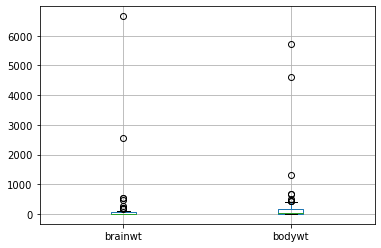

In [13]:
animals.boxplot();

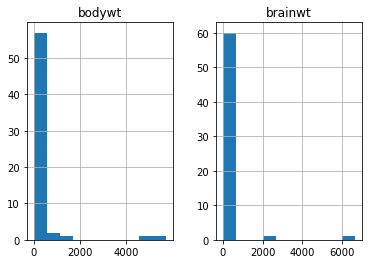

In [15]:
animals.hist();

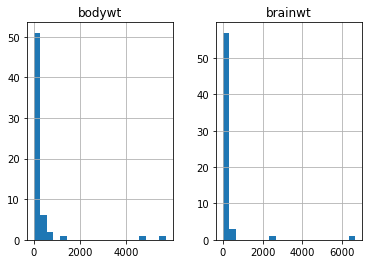

In [16]:
animals.hist(bins = 20);

### Introduction to `scipy`

In [19]:
normal = norm()
norm.cdf(0)

0.5

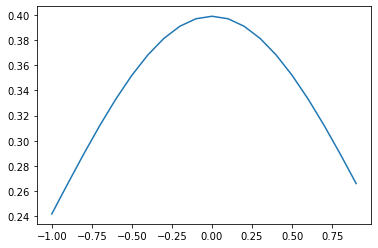

In [23]:
#generate numbers between -1 and 1, increasing in 0.1
x = np.arange(-1, 1, 0.1)

# initialize the normal distribution object
normal = norm()

# use the matplotlib to plot the bell curve 
# generate the probability density function (pdf) for the values in x
plt.plot(x, norm.pdf(x));

In [26]:
from scipy.linalg import solve

equation: 5x + 6y = 10 and 2x + 4y = 8

In [27]:
a = np.array([[5, 6], [2, 4]])
b = np.array([10, 8])

x = solve(a, b)

x

array([-1. ,  2.5])

solution: x = -1 and y = 2,5


### Interpolation

In [28]:
from scipy.interpolate import interp1d

In [36]:
# create a data set where the x value are numbers between 0 and 10
# the y value is the cosine of the x value

x = np.arange(0, 11 ,1)
y = np.cos(x)


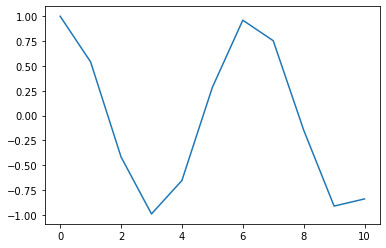

In [37]:
# generate the interpolation function
f = interp1d(x, y)

# create a new dataset 
xnew = np.arange(0, 10.25, 0.25)

# aply the function to the new dataset and plot
plt.plot(xnew, f(xnew));

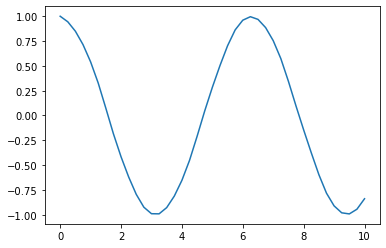

In [39]:
# interpolate using a quadratic spline

f = interp1d(x, y, 'quadratic')
xnew = np.arange(0, 10.25, 0.25)

plt.plot(xnew, f(xnew));

### Bernoulli's Random Variable

is the experiment a success or a failure (0, 1)

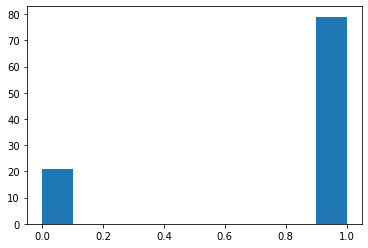

In [41]:


p = 0.8
X = bernoulli.rvs(p, size = 100)
plt.hist(X, align = 'mid');

### Binomial Random Variable 

`n` experiments and recording the results for every experiment


0.21499084800000012
0.3822806016000001
4.0
2.4
1.5491933384829668
[3 4 5 4 4 4 4 5 4 2]


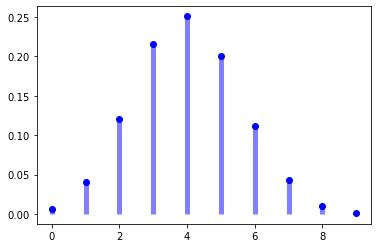

In [53]:
n = 10
p = 0.4

binomial = binom(n, p)
print(binomial.pmf(3))
print(binomial.cdf(3))
print(binomial.mean())
print(binomial.var())
print(binomial.std())
print(binomial.rvs(10))

x = np.arange(0, 10)

fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo');
ax.vlines(x, 0, binom.pmf(x, n, p), colors = 'b', lw = 5, alpha = 0.5);

### Poisson Random Variable

count the number of occurence of an event within a time frame

0.2706705664732254
[3 3 2 2 3 2 3 5 2 1]


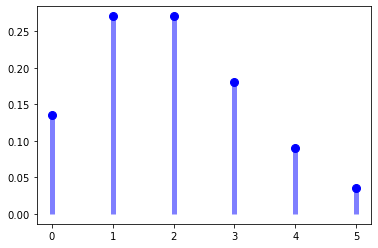

In [63]:
param = 2
po = stats.poisson(param)

print(po.pmf(param))
print(po.rvs(10))

x = np.arange(0, 6)

fig, ax = plt.subplots(1, 1)

ax.plot(x, poisson.pmf(x, param), 'bo', ms = 8, label = 'poisson pmf');
ax.vlines(x, 0, poisson.pmf(x, param), colors = 'b', lw = 5, alpha = 0.5)